In [2]:
import pandas as pd
import numpy as np



In [4]:
df = pd.read_csv('balanced_diabetes_dataset.csv')

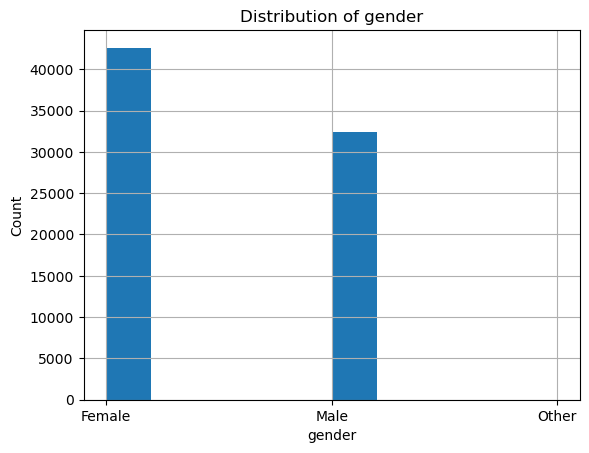

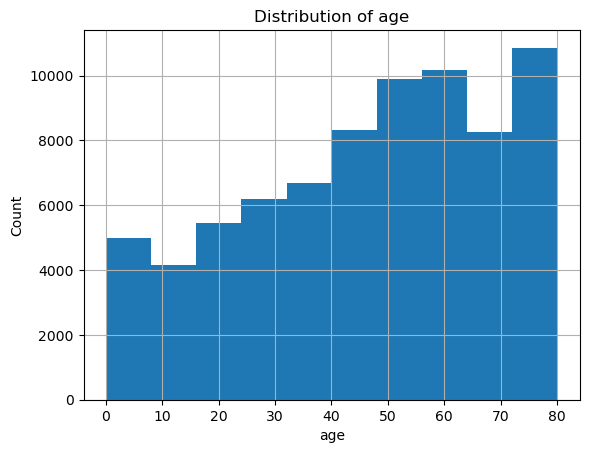

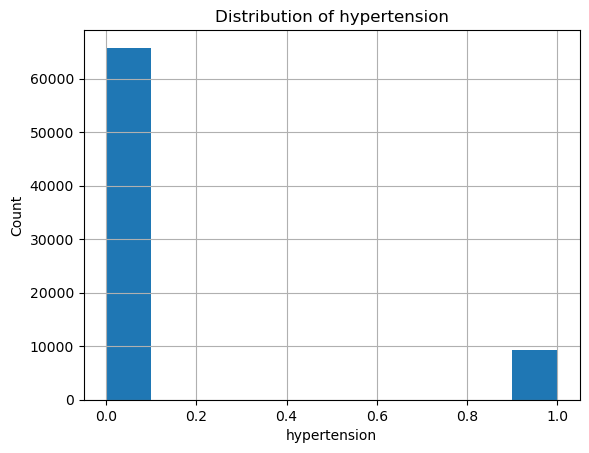

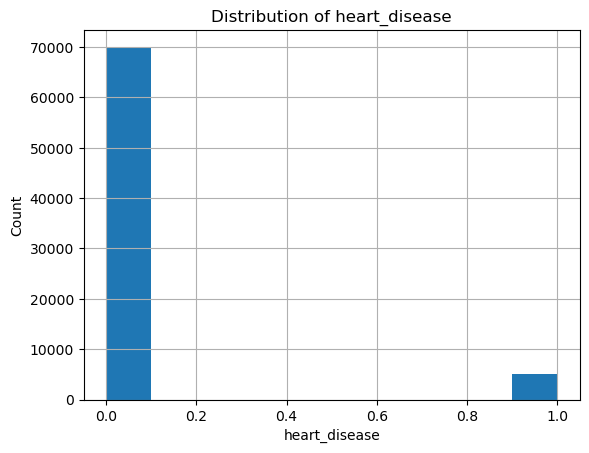

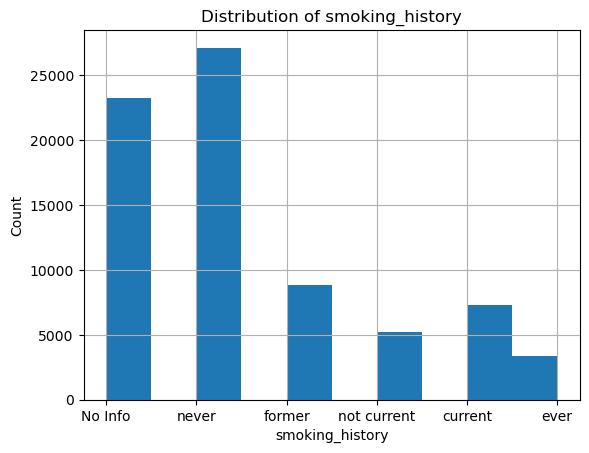

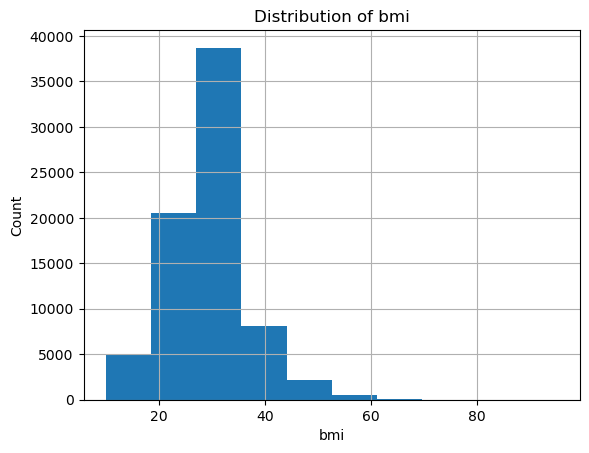

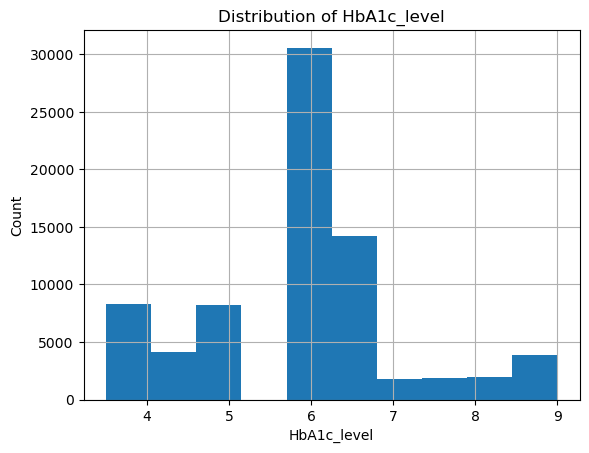

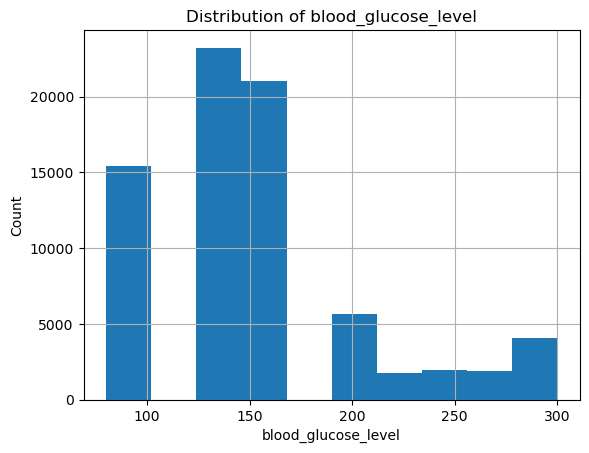

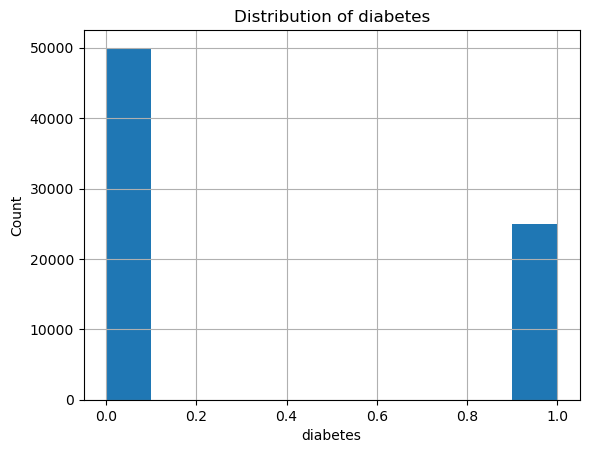

In [5]:
import matplotlib.pyplot as plt

for col in df:
    plt.figure()
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()

In [5]:
report = pd.DataFrame(columns=['Column', 'Count', 'Miss%', 'Cardinality',
                               'Mode', 'Mode Freq', 'Mode%', '2nd Mode', '2nd Mode Freq', '2nd Mode%'])

for col in df.columns:
    # Basic metrics
    count = df[col].count()
    miss_percent = (1 - count / len(df)) * 100
    cardinality = df[col].nunique()
    
    # Mode 
    mode_data = df[col].mode()
    mode = mode_data.iloc[0] if not mode_data.empty else None
    mode_freq = df[col].value_counts().iloc[0] if mode is not None else 0
    mode_percent = (mode_freq / count) * 100 if count > 0 else 0
    
    # Second mode 
    second_mode_data = df[col].value_counts().iloc[1:2]
    second_mode = second_mode_data.index[0] if not second_mode_data.empty else None
    second_mode_freq = second_mode_data.iloc[0] if not second_mode_data.empty else 0
    second_mode_percent = (second_mode_freq / count) * 100 if count > 0 else 0
    
    # Append to the report
    report = pd.concat([report, pd.DataFrame({'Column': [col],
                                              'Count': [count],
                                              'Miss%': [miss_percent],
                                              'Cardinality': [cardinality],
                                              'Mode': [mode],
                                              'Mode Freq': [mode_freq],
                                              'Mode%': [mode_percent],
                                              '2nd Mode': [second_mode],
                                              '2nd Mode Freq': [second_mode_freq],
                                              '2nd Mode%': [second_mode_percent]})], ignore_index=True)

# Display the report
print(report)


C:\Users\kedus\AppData\Local\Temp\ipykernel_2624\2026532038.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'Column': [col],


                Column   Count  Miss% Cardinality     Mode Mode Freq   Mode%  \
0               gender  100000    0.0           3   Female     58552  58.552   
1                  age  100000    0.0         102     80.0      5621   5.621   
2         hypertension  100000    0.0           2        0     92515  92.515   
3        heart_disease  100000    0.0           2        0     96058  96.058   
4      smoking_history  100000    0.0           6  No Info     35816  35.816   
5                  bmi  100000    0.0        4247    27.32     25495  25.495   
6          HbA1c_level  100000    0.0          18      6.6      8540   8.540   
7  blood_glucose_level  100000    0.0          18      130      7794   7.794   
8             diabetes  100000    0.0           2        0     91500  91.500   

  2nd Mode 2nd Mode Freq  2nd Mode%  
0     Male         41430     41.430  
1     51.0          1619      1.619  
2        1          7485      7.485  
3        1          3942      3.942  
4    neve

In [6]:
# ... (Your code to create the 'report' DataFrame) ...

# Save the report to a CSV file
report.to_csv('report.csv', index=False) 


In [7]:
new_df = df[['age', 'bmi','HbA1c_level','blood_glucose_level']] 

summary_report = pd.DataFrame()

summary_report['Count'] = new_df.count()
summary_report['Miss%'] = 100 * (1 - report['Count'] / len(new_df))
summary_report['Cardinality'] = new_df.nunique()
summary_report['Min'] = new_df.min()
summary_report['Q1'] = new_df.quantile(0.25)
summary_report['Mean'] = new_df.mean()
summary_report['Median'] =new_df.median()
summary_report['Q3'] = new_df.quantile(0.75)
summary_report['Max'] = new_df.max()
summary_report['Std Dev'] = new_df.std()

# Display the report
print(summary_report)

                      Count Miss%  Cardinality    Min      Q1        Mean  \
age                  100000   NaN          102   0.08   24.00   41.885856   
bmi                  100000   NaN         4247  10.01   23.63   27.320767   
HbA1c_level          100000   NaN           18   3.50    4.80    5.527507   
blood_glucose_level  100000   NaN           18  80.00  100.00  138.058060   

                     Median      Q3     Max    Std Dev  
age                   43.00   60.00   80.00  22.516840  
bmi                   27.32   29.58   95.69   6.636783  
HbA1c_level            5.80    6.20    9.00   1.070672  
blood_glucose_level  140.00  159.00  300.00  40.708136  


In [8]:
summary_report.to_csv('report2.csv', index=False) 

In [9]:
#Lets do the model :}
df = df.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)
y = df['diabetes']
x = df.drop(columns=['diabetes'])
from sklearn.model_selection import train_test_split





Accuracy: 0.8812727272727273
Confusion Matrix:
[[26708  3493]
 [  425  2374]]
[[-0.41431504  0.06126444 -0.31480205 -0.49281269 -0.09931313  0.09986459
   2.52157524  0.03161685]]


Accuracy: 0.9574848484848485
Confusion Matrix:
[[29550   651]
 [  752  2047]]


In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load your data
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Encode categorical columns if any
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Calculate the new number of minority samples for desired proportion
majority_count = y.value_counts()[0]
minority_desired_ratio = 0.30
new_minority_count = int(majority_count * minority_desired_ratio / (1 - minority_desired_ratio))

# Configure SMOTE
smote = SMOTE(sampling_strategy={1: new_minority_count}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
new_distribution = pd.Series(y_resampled).value_counts()
print('New distribution after adjusted SMOTE:', new_distribution)


New distribution after adjusted SMOTE: diabetes
0    91500
1    39214
Name: count, dtype: int64


In [3]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Separate the majority and minority classes
df_majority = df[df.diabetes == 0]
df_minority = df[df.diabetes == 1]

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,    
                                   n_samples=25000,  
                                   random_state=123) 

# Combine the oversampled minority class with the original majority class before undersampling
df_combined = pd.concat([df_majority, df_minority_oversampled])

# Undersample the majority class
df_majority_undersampled = resample(df_combined[df_combined.diabetes == 0], 
                                    replace=False,    # sample without replacement
                                    n_samples=50000,  # to match the new majority size
                                    random_state=123) # reproducible results

# Combine the undersampled majority class with the oversampled minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority_oversampled])

# Check the new distribution of the target variable
print(df_balanced['diabetes'].value_counts())

# Save the balanced dataset if needed
df_balanced.to_csv('balanced_diabetes_dataset.csv', index=False)

diabetes
0    50000
1    25000
Name: count, dtype: int64
